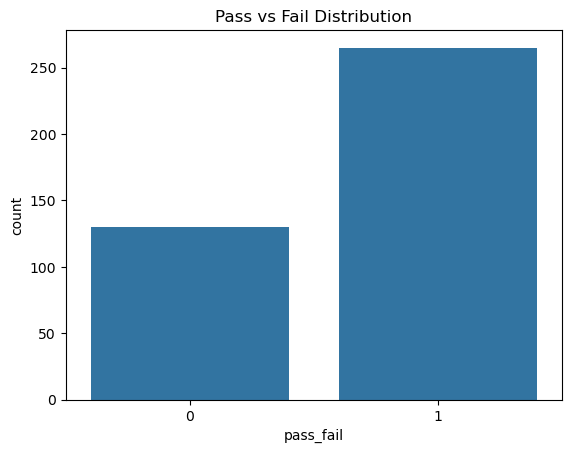

In [1]:
# Install seaborn (only needed once)
!pip install seaborn

# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/student-mat.csv", sep=';')

# Create binary target: pass = 1 if G3 >= 10
df["pass_fail"] = (df["G3"] >= 10).astype(int)

# Plot: count of pass vs fail
sns.countplot(x="pass_fail", data=df)

plt.title("Pass vs Fail Distribution")
plt.show()

In [2]:
# View the first few rows of the dataset
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0


In [3]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass_fail     0
dtype: int64

Here, we can see that there are no missing values for each column.

In [4]:
df.duplicated().sum()

0

Here, we verify that there are no duplicates

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

We used df.info() to check the structure of the dataset. The dataset contains 33 columns:

Numerical features like age, G1, G2, absences are stored as int64, as expected.

While categorical variables such as sex, school, address, and Mjob appear as object types, which is expected since they contain string labels.

No missing values were detected, and all columns are complete with 395 entries.

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


We used df.describe() to get an overview of the numeric features in the dataset. This provides summary statistics including the mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, 75%) for each numeric column.

The dataset includes 395 students.

Grades (G1, G2, G3) range from 0 to 20, with average final grade G3 around 10.4, which is in line with the pass/fail threshold.

The absences column has a maximum value of 75, which might suggest potential outliers or exceptional cases of absenteeism.

Most features such as studytime, Dalc, and Walc are bounded between 1–5 and show a reasonable spread.

Failures mostly centers around 0, but some students have up to 3 past failures.

These statistics help us identify possible data quality issues (e.g., outliers in absences) and guide us in selecting features for modeling.

<Axes: xlabel='pass_fail', ylabel='count'>

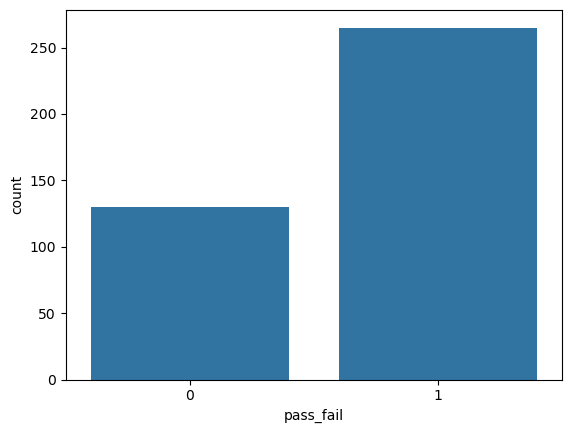

In [7]:
sns.countplot(x="pass_fail", data=df)

When we looked at the number of students who passed and failed, we saw that more students passed than failed.
This means the dataset is not perfectly balanced, but the difference is not too big.
Because of that, we don’t need to use special techniques to fix it, like duplicating the failed students or removing some of the passed ones.

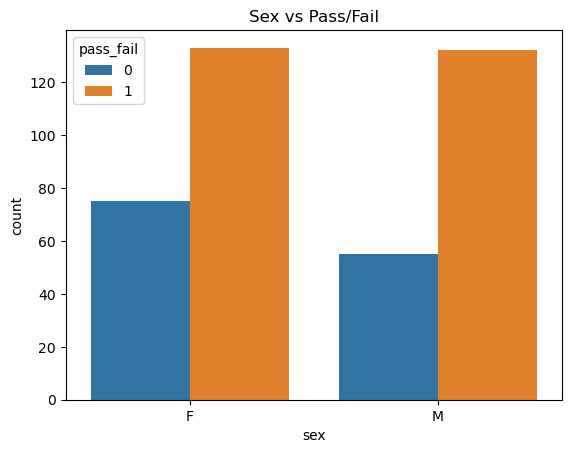

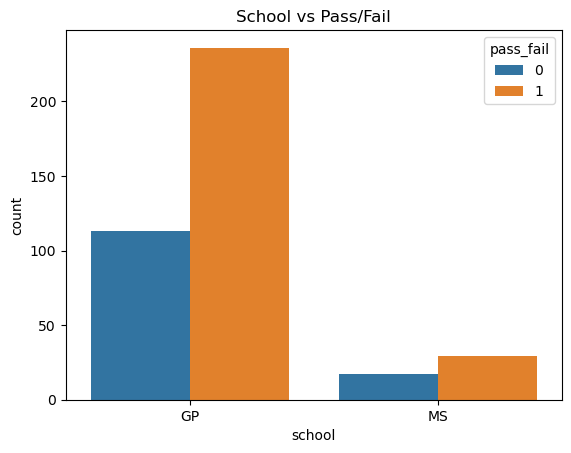

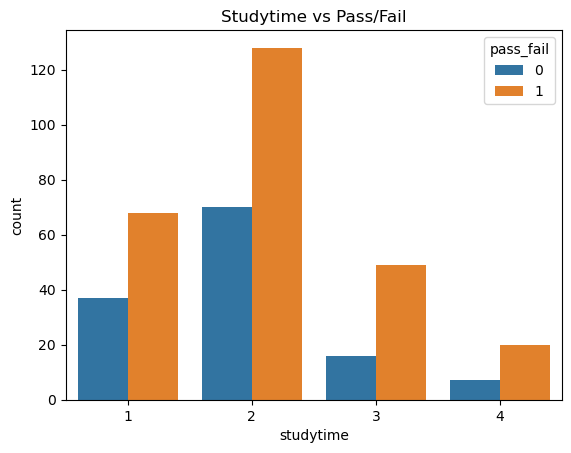

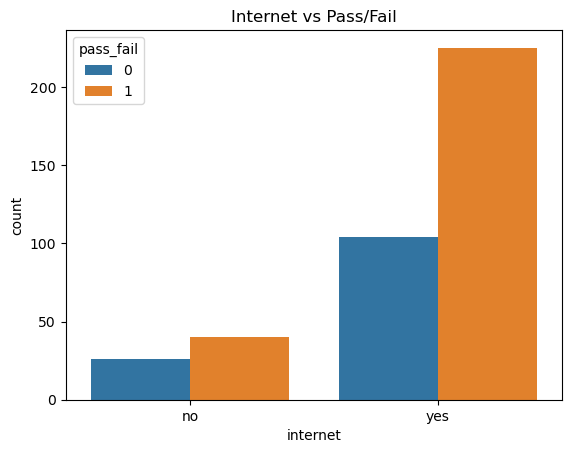

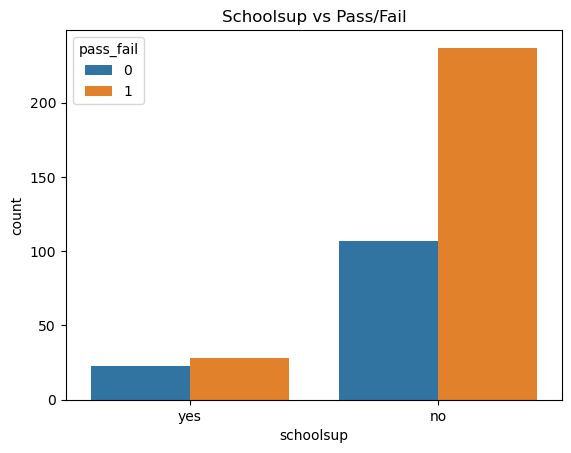

In [8]:
for col in ['sex', 'school', 'studytime', 'internet', 'schoolsup']:
    sns.countplot(x=col, hue="pass_fail", data=df)
    plt.title(f"{col.capitalize()} vs Pass/Fail")
    plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to work with
df_encoded = df.copy()

# Identify and encode all object (categorical) columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop(columns=["pass_fail"])
y = df_encoded["pass_fail"]

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 52]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        52

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



We trained a Logistic Regression model on the cleaned student dataset to predict pass/fail. The model achieved 100% accuracy on the test set, with a perfect precision, recall, and F1-score for both classes. This may be due to strong predictors like G1 and G2, which are highly correlated with the final grade.

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Drop target column first
X_vif = df_encoded.drop(columns=["pass_fail"])

# Optional: If you're using a subset of features (e.g., drop G1, G2), do it here:
# X_vif = X_vif.drop(columns=["G1", "G2"])

# Step 1: Create DataFrame of VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Step 2: View VIF
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
2,age,94.244018
31,G2,74.214085
30,G1,52.225573
32,G3,39.616425
23,famrel,22.961681
20,higher,21.877657
6,Medu,16.131143
24,freetime,14.333373
25,goout,12.760979
7,Fedu,11.977220


## Feature Engineering 

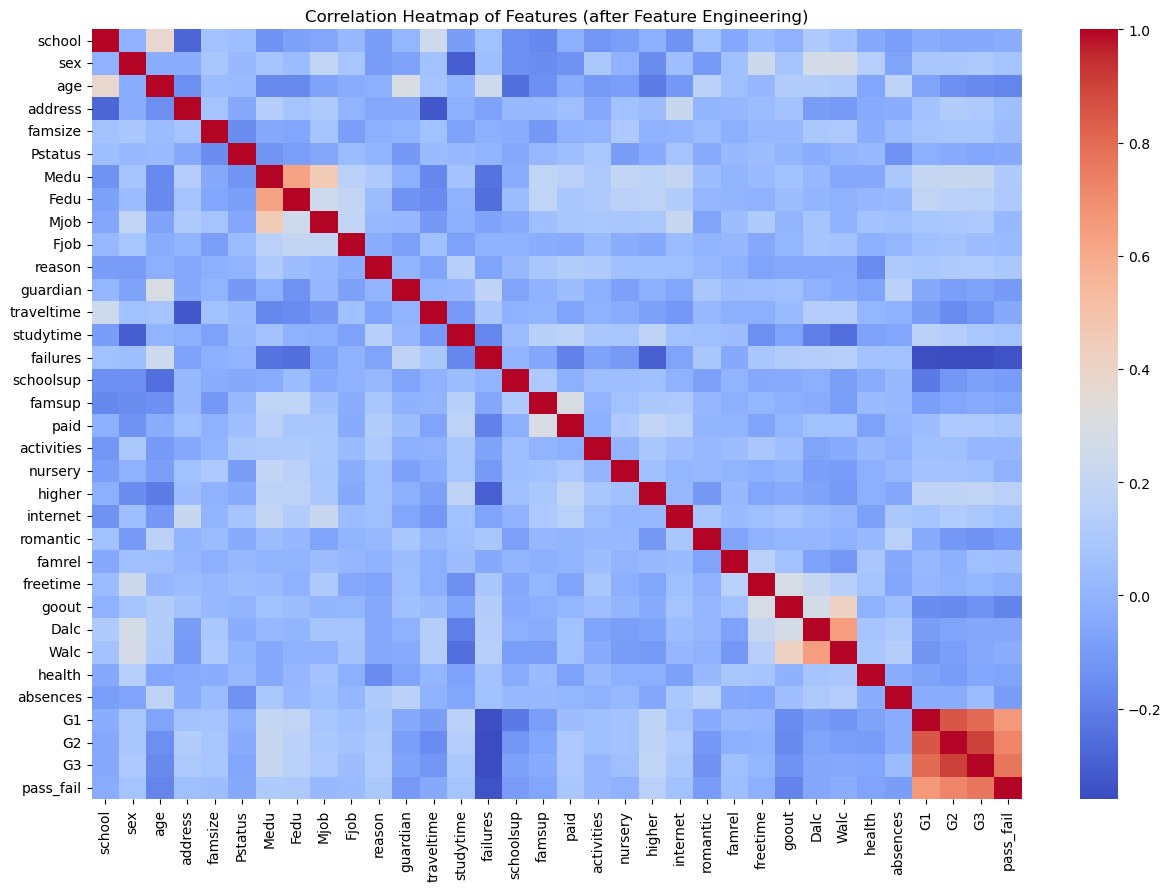

In [13]:
plt.figure(figsize=(15,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap of Features (after Feature Engineering)")
plt.show()

In [14]:
strong_pairs = (
    corr.stack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "Feature1", "level_1": "Feature2"})
)
strong_pairs = strong_pairs[
    (strong_pairs['Feature1'] != strong_pairs['Feature2']) &
    (strong_pairs['correlation'].abs() > 0.4)
]

strong_pairs = strong_pairs.drop_duplicates(subset=["correlation"])

strong_pairs.sort_values(by="correlation", ascending=False)

,Feature1,Feature2,correlation
1086,G2,G3,0.904868
1051,G1,G2,0.852118
1052,G1,G3,0.801468
1121,G3,pass_fail,0.770042
1087,G2,pass_fail,0.725407
1053,G1,pass_fail,0.664979
911,Dalc,Walc,0.647544
211,Medu,Fedu,0.623455
212,Medu,Mjob,0.454805
877,goout,Walc,0.420386


### Combining Features

Suggested multicoliniarity comes from the coloumns freetime & goout, Medu & Fedu, Fjob & Mjob, and Dalc &  Walc. Since most of involve a single feature split into 2 categories. We will combine serveral of them as follows.

In [15]:
df_new = df.copy()
df_new['parent_edu_avg'] = df[['Medu', 'Fedu']].mean(axis=1)
df_new['parents_employed'] = ((df['Mjob'] != 'at_home') & (df['Fjob'] != 'at_home')).astype(int) #Both parents are employed
df_new['alc_consumption'] = df_new[['Dalc', 'Walc']].mean(axis=1)


df_new = df_new.drop(columns=['Medu', 'Fedu', 'Fjob', 'Mjob','Dalc', 'Walc'])

In [16]:
df_encoded_new = df_new.copy()

categorical_cols = df_encoded_new.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_new[col] = le.fit_transform(df_encoded_new[col])

### Dropping Features

The colomns "G1", "G2" and  "G3" will be dropped as in the real world we are assuming people will not have access to this information. Due to high multicolinearity, "age", "famrel", "freetime", "higher" were dropped from the data. We dropped "freetime" over "gout" as going out is a more specific thing to do with one's free time and can inform us more about what a student does with their time.

In [17]:
X_vif = df_encoded_new.drop(columns=["pass_fail"])

X_vif = X_vif.drop(columns=["G1", "G2", "G3", "age", "famrel", "freetime", "higher"])

# Step 1: Create DataFrame of VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
17,goout,10.763399
20,parent_edu_avg,10.289909
4,Pstatus,8.857518
8,studytime,7.387707
18,health,7.220072
15,internet,6.990300
22,alc_consumption,6.908947
21,parents_employed,6.429974
7,traveltime,5.650679
2,address,5.234245


In [18]:
df_new = df_new.drop(columns=["G1", "G2", "G3", "age", "famrel", "freetime", "higher"])

In [19]:
#plt.figure(figsize=(15,10))
#corr = df_encoded_new.corr()
#sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.2f')
#plt.title("Correlation Heatmap of Features (after Feature Engineering)")
#plt.show()

## Cleaned and Filtered Data with Feature Engineering

The following is the cleaned data with relevant features.

In [20]:
df_new.head(2)

,school,sex,address,famsize,Pstatus,reason,guardian,traveltime,studytime,failures,...,nursery,internet,romantic,goout,health,absences,pass_fail,parent_edu_avg,parents_employed,alc_consumption
0,GP,F,U,GT3,A,course,mother,2,2,0,...,yes,no,no,4,3,6,0,4.0,0,1.0
1,GP,F,U,GT3,T,course,father,1,2,0,...,no,yes,no,3,3,4,0,1.0,0,1.0


Encoded Cleaned Data

In [21]:
df_encoded_new = df_new.copy()

categorical_cols = df_encoded_new.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_new[col] = le.fit_transform(df_encoded_new[col])

In [22]:
df_encoded_new.head(2)

,school,sex,address,famsize,Pstatus,reason,guardian,traveltime,studytime,failures,...,nursery,internet,romantic,goout,health,absences,pass_fail,parent_edu_avg,parents_employed,alc_consumption
0,0,0,1,0,0,0,1,2,2,0,...,1,0,0,4,3,6,0,4.0,0,1.0
1,0,0,1,0,1,0,0,1,2,0,...,0,1,0,3,3,4,0,1.0,0,1.0
